In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('20230522_2216_1-1_4232.csv')
df.head()

,generation,id,fitness,max_position,chassis_mass,wheels_mass_0,wheels_mass_1,wheels_mass_2,wheels_mass_3,wheels_mass_4,wheels_mass_5,wheels_mass_6,wheels_mass_7,frames,is_winner,cumulative_stall_time,chassis_vertices_x_0,chassis_vertices_x_1,chassis_vertices_x_2,chassis_vertices_x_3,chassis_vertices_x_4,chassis_vertices_x_5,chassis_vertices_x_6,chassis_vertices_x_7,chassis_vertices_y_0,chassis_vertices_y_1,chassis_vertices_y_2,chassis_vertices_y_3,chassis_vertices_y_4,chassis_vertices_y_5,chassis_vertices_y_6,chassis_vertices_y_7,chassis_densities_0,chassis_densities_1,chassis_densities_2,chassis_densities_3,chassis_densities_4,chassis_densities_5,chassis_densities_6,chassis_densities_7,wheel_radii_0,wheel_radii_1,wheel_radii_2,wheel_radii_3,wheel_radii_4,wheel_radii_5,wheel_radii_6,wheel_radii_7,wheel_densities_0,wheel_densities_1,wheel_densities_2,wheel_densities_3,wheel_densities_4,wheel_densities_5,wheel_densities_6,wheel_densities_7,wheels_vertices_r_0,wheels_vertices_r_1,wheels_vertices_r_2,wheels_vertices_r_3,wheels_vertices_r_4,wheels_vertices_r_5,wheels_vertices_r_6,wheels_vertices_r_7,wheels_vertices_theta_0,wheels_vertices_theta_1,wheels_vertices_theta_2,wheels_vertices_theta_3,wheels_vertices_theta_4,wheels_vertices_theta_5,wheels_vertices_theta_6,wheels_vertices_theta_7
0,0,1_000001EF2C6D7A00,0.004000,-100.000000,247.208099,325.8555603027344,None,6.130019664764404,21.160924911499023,None,27.329843521118164,None,57.20703887939453,11,False,55,0.783481,0.707684,0.0,-1.150950,-0.349087,-1.045735,0.0,0.631870,0.0,1.280277,0.247954,0.174549,0.0,-0.254676,-0.448833,-1.076890,146.220335,175.827317,259.119704,55.047813,231.413362,254.856277,36.167815,105.651748,0.308508,0.000000,0.109426,0.314218,0.000000,0.197965,0.000000,0.466277,185.852240,0.000000,162.955303,63.356705,0.000000,133.520100,0.000000,40.021563,0.478165|0.294916|0.89526|0.552724|1.206132|0....,None,None,0.766018|0.482012|0.323472|0.234929,None,0.71415|1.088189|0.964541,None,0.542942|0.776856|1.170543|0.533118|0.247026|1...,0|45|90|135|180|225|270|315,None,None,0|90|180|270,None,0|120|240,None,0|45|90|135|180|225|270|315
1,0,1_000001EF2C6E0220,0.002857,-100.000000,359.839478,108.21656036376953,33.16570281982422,84.47445678710938,198.8253936767578,None,83.16767883300781,30.388919830322266,32.87242126464844,11,False,55,0.333748,0.378797,0.0,-1.155813,-0.423999,-0.402121,0.0,0.363661,0.0,0.393898,0.832128,0.639438,0.0,-1.286949,-1.241219,-0.725855,297.997198,227.306762,218.158717,103.306531,274.645744,221.854990,191.803340,98.453995,0.215420,0.355090,0.306269,0.454616,0.000000,0.319528,0.234305,0.268872,138.273562,83.726343,152.708163,150.672532,0.000000,150.726691,176.197783,144.740256,0.697588|1.212657|0.87651|0.230636|0.796965,None,0.590983|0.624828|0.752118|0.172652,0.960152|1.04396|0.47011|0.5029|0.687993|1.280...,None,0.861145|1.082705|0.162877|0.188879,None,None,0|72|144|216|288,None,0|90|180|270,0|51|102|153|204|255|306,None,0|90|180|270,None,None
2,0,1_000001EF2C6E1A60,0.001150,-100.000000,130.276962,None,None,13.670853614807129,None,180.24972534179688,None,None,None,11,False,55,0.125032,0.558485,0.0,-0.489056,-0.231532,-1.137068,0.0,1.125219,0.0,0.446546,1.005351,0.124584,0.0,-0.149264,-0.280749,-0.310269,267.210171,248.997776,70.263315,189.677305,160.958804,131.435461,50.562864,59.735624,0.000000,0.000000,0.241319,0.000000,0.219764,0.000000,0.000000,0.000000,0.000000,0.000000,74.724524,0.000000,125.764653,0.000000,0.000000,0.000000,None,None,None,None,0.462222|1.113087|0.872953|0.404087|1.127881|0...,None,None,None,None,None,None,None,0|45|90|135|180|225|270|315,None,None,None
3,0,1_000001EF2C6E4670,0.006804,0.301997,138.327164,9.37805461883545,23.8903865814209,61.84785842895508,None,None,None,None,None,29,False,58,1.119498,0.394265,0.0,-0.293080,-0.304061,-0.148021,0.0,0.651005,0.0,0.887994,1.054900,0.202455,0.0,-0.560799,-0.567964,-0.119782,46.633100,107.069222,120.535929,246.714571,137.261549,139.346077,244.361941,58.456200,0.258732,0.287437,0.218

In [6]:
def count_non_none(row):
    return row[row > 0].count()

generation_dict = {}
for gen in range(0, df["generation"].max()):
    generation_dict[gen] = []
    selected_cols = df.loc[df['generation'] == gen, [col for col in df.columns if "wheel_densities_" in col]]
    
    #print(selected_cols)
    generation_dict[gen].append(list(selected_cols.apply(count_non_none, axis=1)))

In [9]:
HIST_BINS = np.arange(1, 10, 1)
# Define the animation function
def prepare_animation(bar_container):
    gen_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=14, verticalalignment='top')
     
    def animate(frame_number):
        generation = frame_number 
        gen_text.set_text('Generation: {}'.format(generation))
        #print("Generation: ", generation)
        if generation in generation_dict:
            data = generation_dict[generation]
        else:
            data = []
              
        n, _ = np.histogram(data, HIST_BINS)
         
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)

        return bar_container.patches
        
    plt.close() 
    return animate




# Set up the initial histogram
fig, ax = plt.subplots(figsize =(12,8))
_, _, bar_container = ax.hist([], HIST_BINS, align = 'left', lw=1, ec="black", fc="red", alpha=0.5)
ax.set_ylim(0,105)
ax.set_xlabel("Number of wheels per individual", fontsize=20)
ax.set_ylabel("Number of individuals", fontsize=20)
ax.set_title("Number of wheels per individual at each generation", fontsize=20, fontweight = "bold")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# Create the animation
ani = animation.FuncAnimation(fig, prepare_animation(bar_container), len(generation_dict), interval=1000, repeat=True, blit=True)

# Display the animation
HTML(ani.to_html5_video())

In [10]:
# Loop through the generations and create a histogram for each one
wheel_dict = {}
poly_dict = {}

for generation in range(1, df["generation"].max() + 1):
    # Create a subset dataframe containing only the individuals from the current generation
    generation_df = df[df["generation"] == generation]
    
    # lista dei valori delle ruote circolari, poligonali e il numero di vertici delle ruote poligonali
    circ_wheels = []
    poly_wheels = []
    poly_vertices = []

    # loop attraverso tutte le righe del dataframe
    for index, row in generation_df.iterrows():
        circ_count = 0
        poly_count = 0
        poly_vertices_count = []
        for i in range(8):

            if (row[f"wheel_densities_{i}"] > 0):
                if row[f"wheels_vertices_theta_{i}"] != "None":
                    poly_count += 1
                    poly_vertices_count.append(len(row[f"wheels_vertices_theta_{i}"].split("|")))
                elif (row[f"wheels_vertices_theta_{i}"] == "None"):
                    circ_count += 1
                

        circ_wheels.append(circ_count)
        poly_wheels.append(poly_count)
        poly_vertices.extend(poly_vertices_count)
    
    circ_wheels = [0] * np.sum(np.array(circ_wheels))
    
    wheel_dict[generation] = []
    wheel_dict[generation].append(circ_wheels)
    
    poly_dict[generation] = []
    poly_dict[generation].append(poly_vertices)

In [11]:
HIST_BINS = np.arange(0, 10, 1)

# Define the animation function
def prepare_animation(bar_container_poly, bar_container_wheel):
    gen_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=14, verticalalignment='top')

    def animate(frame_number):
        generation = frame_number
        gen_text.set_text('Generation: {}'.format(generation))

        if generation in poly_dict:
            data_poly = poly_dict[generation]
        else:
            data_poly = []

        if generation in wheel_dict:
            data_wheel = wheel_dict[generation]
        else:
            data_wheel = []

        n_poly, _ = np.histogram(data_poly, HIST_BINS)
        n_wheel, _ = np.histogram(data_wheel, HIST_BINS)

        for count_poly, rect_poly, count_wheel, rect_wheel in zip(n_poly, bar_container_poly.patches, n_wheel, bar_container_wheel.patches):
            rect_poly.set_height(count_poly)
            rect_wheel.set_height(count_wheel)

        return bar_container_poly.patches + bar_container_wheel.patches

    plt.close()

    return animate


# Set up the initial histograms
fig, ax = plt.subplots(figsize=(12, 8))
_, _, bar_container_poly = ax.hist([], HIST_BINS, align='left', lw=1, ec="black", fc="red", alpha=0.5, label='Poligonal wheels')
_, _, bar_container_wheel = ax.hist([], HIST_BINS, align='left', lw=1, ec="black", fc="blue", alpha=0.5, label='Circular wheels')
ax.set_ylim(0, 300)
ax.set_xlabel("Number of vertices per wheel", fontsize=20)
ax.set_ylabel("Number of wheels", fontsize=20)
ax.set_title("Wheels' vertices distribution per generation", fontsize=20, fontweight="bold")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()

xticks = np.arange(len(HIST_BINS))
xtick_labels = [str(int(tick)) if tick != 0 else "circular" for tick in HIST_BINS]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

# Create the animation
ani = animation.FuncAnimation(fig, prepare_animation(bar_container_poly, bar_container_wheel), len(generation_dict), interval=1000, repeat=True, blit=True)

# Display the animation
HTML(ani.to_html5_video())

In [12]:
for index, row in df.iterrows():
    #iterate along each vertex
    for i in range(8):
        if row[f'wheels_vertices_r_{i}'] == 'None' and row[f'wheel_densities_{i}'] > 0:
            total_circular_wheels += 1

        if row[f'wheels_vertices_r_{i}'] != 'None' and row[f'wheel_densities_{i}'] > 0:
            total_polygonal_wheels += 1

NameError: name 'total_polygonal_wheels' is not defined

In [13]:
circular_wheels_per_generation = []
polygonal_wheels_per_generation = []

def count_total_circular_wheels(df):
    for gen in range(0, df["generation"].max()+1):
        
        total_circular_wheels = 0
        total_polygonal_wheels = 0
        
        for index, row in df.iterrows():
            #iterate along each vertices
            for i in range(8):
                if row['generation'] == gen and row[f'wheels_vertices_r_{i}'] == 'None' and row[f'wheel_densities_{i}'] > 0:
                                                                   total_circular_wheels += 1
                        
                if row['generation'] == gen and row[f'wheels_vertices_r_{i}'] != 'None' and row[f'wheel_densities_{i}'] > 0:
                    total_polygonal_wheels += 1
                    
        circular_wheels_per_generation.append(total_circular_wheels)
        polygonal_wheels_per_generation.append(total_polygonal_wheels)
        
        
    return circular_wheels_per_generation, polygonal_wheels_per_generation

circular_wheels_per_generation, polygonal_wheels_per_generation = count_total_circular_wheels(df) 

In [14]:
# Inizializzazione della figura e degli assi
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim(0, 2)
ax.set_ylim(0, max(max(circular_wheels_per_generation), max(polygonal_wheels_per_generation))+50)

# Creazione dei rettangoli che rappresentano gli istogrammi
rect1 = Rectangle((0.35, 0), 0.3, circular_wheels_per_generation[0], color='blue', alpha=0.5, label= 'circular wheels')
rect2 = Rectangle((1.35, 0), 0.3, polygonal_wheels_per_generation[0], color='red', alpha=0.5, label= 'polygonal wheels')
ax.add_patch(rect1)
ax.add_patch(rect2)

# Aggiunta delle etichette degli assi e dei titoli
#ax.set_xlabel('Tipo di ruota')
ax.set_ylabel('Total number of wheels', fontsize=20)
ax.set_title('Type wheels comparison', fontsize=20, fontweight = "bold")
ax.legend(loc='upper right')

# Aggiunta dei ticks dell'asse x
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['circular wheels ', 'polygonal wheels'], fontsize=20)

# Definizione della funzione di animazione
def prepare_animation(frame_number):
    # Aggiornamento dell'altezza dei rettangoli
    rect1.set_height(circular_wheels_per_generation[frame_number])
    rect2.set_height(polygonal_wheels_per_generation[frame_number])
    frame_text.set_text('Generation: {}'.format(frame_number))
    plt.close()
    # Restituzione dei rettangoli
    return [rect1, rect2]

# Creazione del testo per il valore del frame
frame_text = ax.text(0.05, ax.get_ylim()[1]*0.9, 'Frame: 0', fontsize=12)

# Creazione dell'animazione
ani = animation.FuncAnimation(fig, prepare_animation, frames=len(circular_wheels_per_generation), blit=True, interval=1000)

HTML(ani.to_html5_video())

In [15]:
df_wheel_masses = df.copy()
df_wheel_masses.loc[:, 'wheels_mass_0':'wheels_mass_7'] = df.loc[:, 'wheels_mass_0':'wheels_mass_7'].fillna(0).apply(pd.to_numeric, errors='coerce')
df_wheel_masses = df_wheel_masses.loc[:, ['chassis_mass'] + ["max_position"] + ['fitness'] + ['generation'] + [col for col in df_wheel_masses.columns if col.startswith('wheels_mass_')]]
df_wheel_masses['total_wheels_weight'] = df_wheel_masses.loc[:, df_wheel_masses.columns.str.startswith('wheels_mass_')].sum(axis=1, skipna=True)

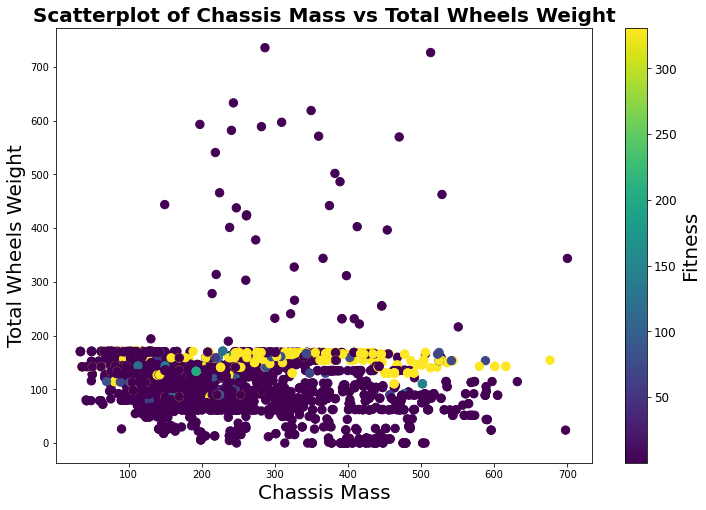

In [16]:
# Crea la figura del grafico con la dimensione desiderata
fig, ax = plt.subplots(figsize=(12, 8))

# Crea lo scatterplot
scatter_plot = ax.scatter(df_wheel_masses['chassis_mass'], df_wheel_masses['total_wheels_weight'], c=df_wheel_masses['fitness'], s = 70)

# Aggiungi etichette agli assi e al grafico
ax.set_xlabel('Chassis Mass', fontsize=20)
ax.set_ylabel('Total Wheels Weight', fontsize=20)
ax.set_title('Scatterplot of Chassis Mass vs Total Wheels Weight',fontsize=20, fontweight = "bold")

# Aggiungi la barra dei colori e imposta la dimensione del testo
cbar = plt.colorbar(scatter_plot, ax=ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Fitness', fontsize=20)

# Mostra il grafico
plt.show()

<ipython-input-17-ec647216cb85>:29: UserWarning: The label '_child0' of <matplotlib.collections.PathCollection object at 0x000001BA30692F10> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=legend_elements, fontsize=16)
<ipython-input-17-ec647216cb85>:29: UserWarning: The label '_child6' of <matplotlib.lines.Line2D object at 0x000001BA305E8F70> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=legend_elements, fontsize=16)


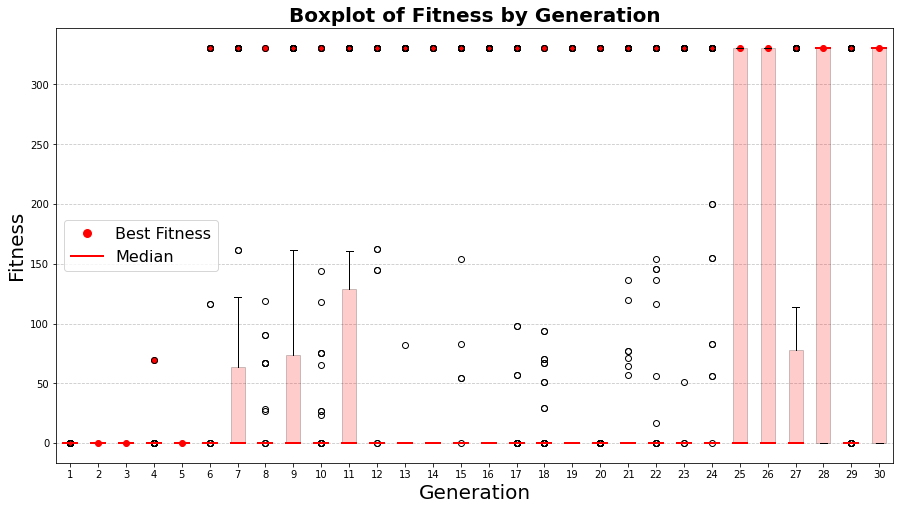

In [17]:
fig = plt.figure(figsize=(15, 8))

# Raggruppa i dati per generazione
grouped_data = df.groupby('generation')
max_fitness_values = grouped_data['fitness'].max()
scatter = plt.scatter(max_fitness_values.index+1, max_fitness_values.values, color= "red")
# Crea un elenco dei valori della colonna "fitness" per ogni generazione
fitness_values = [data['fitness'].values for generation , data in grouped_data]

# Personalizza lo stile del boxplot
boxprops = {'facecolor': 'red', 'edgecolor': 'black', 'alpha':0.2}
medianprops = {'color': 'red', 'linewidth': 2}


# Crea il boxplot dei valori della colonna "fitness" per ogni generazione
bp = plt.boxplot(fitness_values, patch_artist=True, boxprops=boxprops, medianprops=medianprops)

# Aggiungi una griglia di sfondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Aggiungi etichette agli assi e al grafico
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Fitness', fontsize=20)
plt.title('Boxplot of Fitness by Generation', fontsize=20, fontweight ="bold")

plt.xticks(range(1, len(fitness_values) +1, 1))

legend_elements = [scatter, bp["medians"][0], Line2D([0], [0], marker='o', color='w', label='Best Fitness', markerfacecolor='red', markersize=10), plt.Line2D([0], [0], color='red', linewidth=2, label='Median')]
plt.legend(handles=legend_elements, fontsize=16)


plt.show()

<ipython-input-18-d6f7bbdc4ae1>:25: UserWarning: The label '_child5' of <matplotlib.lines.Line2D object at 0x000001BA34E886D0> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=legend_elements, fontsize=16)


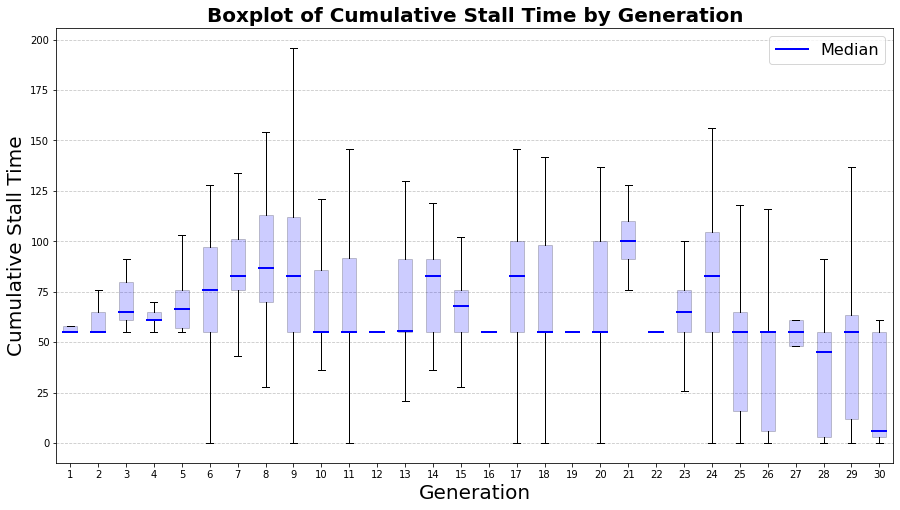

In [18]:
# Crea una figura
fig = plt.figure(figsize=(15, 8))

# Raggruppa i dati per generazione
grouped_data = df.groupby('generation')
cumulative_stall_time_values = [data['cumulative_stall_time'].values for generation, data in grouped_data]

# Personalizza lo stile del boxplot
boxprops = {'facecolor': 'blue', 'edgecolor': 'black', 'alpha':0.2}
medianprops = {'color': 'blue', 'linewidth': 2}

# Crea il boxplot dei valori di cumulative_stall_time per ogni generazione
bp = plt.boxplot(cumulative_stall_time_values, patch_artist=True, boxprops=boxprops, medianprops=medianprops, showfliers=False)

# Aggiungi una griglia di sfondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Aggiungi etichette agli assi e al grafico
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Cumulative Stall Time', fontsize=20)
plt.title('Boxplot of Cumulative Stall Time by Generation', fontsize=20, fontweight ="bold")

# Aggiungi una legenda
legend_elements = [bp["medians"][0], plt.Line2D([0], [0], color='blue', linewidth=2, label='Median')]
plt.legend(handles=legend_elements, fontsize=16)

# Imposta i tick degli assi x
plt.xticks(range(1, len(cumulative_stall_time_values) +1, 1))

# Mostra il grafico
plt.show()

<Figure size 1080x576 with 0 Axes>

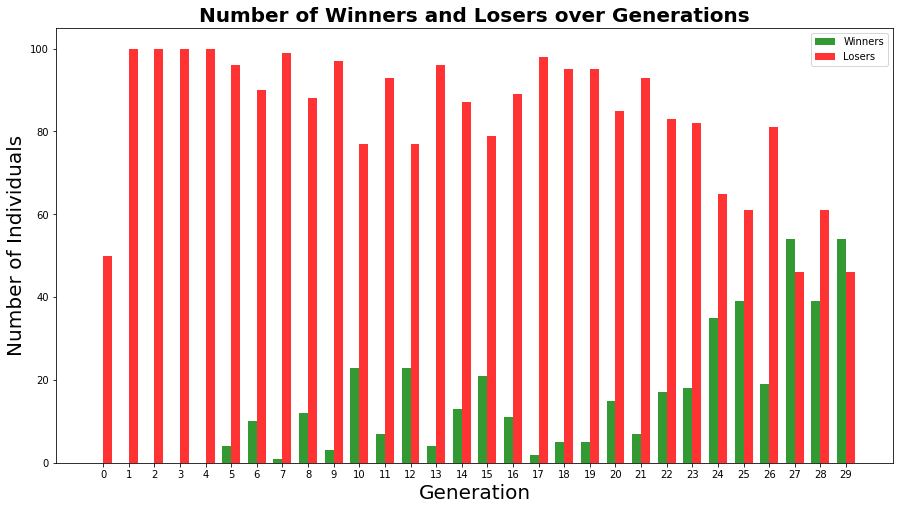

In [19]:
fig = plt.figure(figsize=(15, 8))

winners_count = df.groupby('generation')['is_winner'].sum()

# seleziona solo le righe in cui is_winner è False
losers = df.loc[df['is_winner'] == False]
# raggruppa i dati per generazione e conta il numero di righe in ogni gruppo
losers_count = losers.groupby('generation').size()

# crea l'istogramma
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.35
opacity = 0.8
winners_bar = ax.bar(winners_count.index, winners_count.values, bar_width, alpha=opacity, color='g', label='Winners')
losers_bar = ax.bar(losers_count.index + bar_width, losers_count.values, bar_width, alpha=opacity, color='r', label='Losers')

plt.xlabel('Generation', fontsize=20)
plt.ylabel('Number of Individuals', fontsize=20)
plt.title('Number of Winners and Losers over Generations', fontsize=20, fontweight='bold')
plt.xticks(winners_count.index + bar_width / 2, winners_count.index)
plt.legend()

# posiziona le etichette dell'asse x al centro delle barre
ax.set_xticks(winners_count.index + bar_width / 2)

plt.show()

<ipython-input-53-cc1cde542c8d>:41: UserWarning: The label '_child185' of <matplotlib.lines.Line2D object at 0x000001BA35786D00> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=legend_elements, fontsize=16)
<ipython-input-53-cc1cde542c8d>:41: UserWarning: The label '_child5' of <matplotlib.lines.Line2D object at 0x000001BA35C5D8E0> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=legend_elements, fontsize=16)


<IPython.core.display.Javascript object>


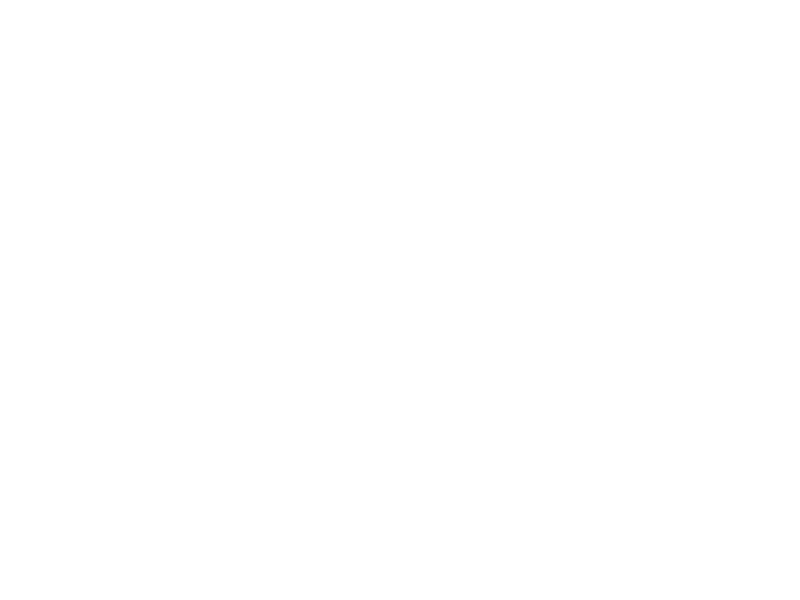

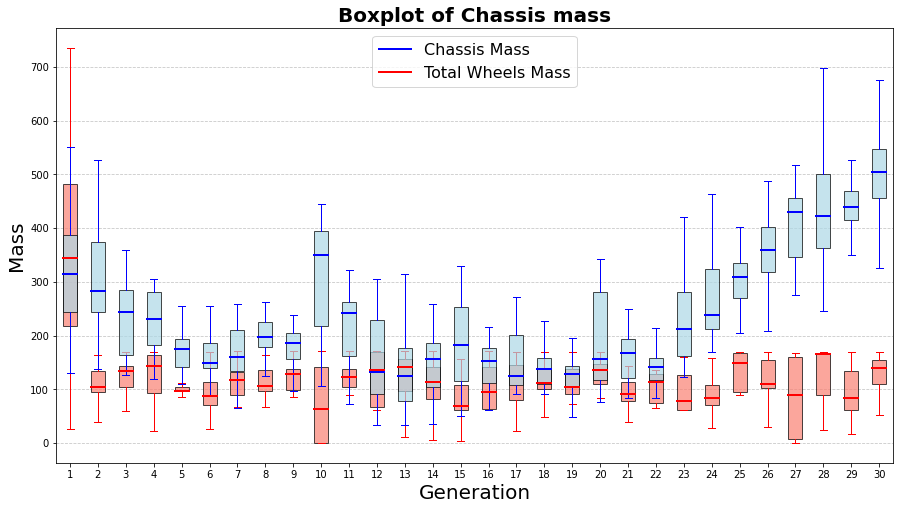

In [53]:
# Crea una figura
%matplotlib inline
fig = plt.figure(figsize=(15, 8))

# Raggruppa i dati per generazione
grouped_data = df_wheel_masses.groupby('generation')
chassis_mass_values = [data['chassis_mass'].values for generation, data in grouped_data]
wheels_mass_values = [data['total_wheels_weight'].values for generation, data in grouped_data]


# Personalizza lo stile del boxplot
boxprops1 = {'facecolor': 'lightblue', 'edgecolor': 'black', 'alpha':0.7}
medianprops1 = {'color': 'blue', 'linewidth': 2}
whiskerprops1 = {'color': 'blue'}
capprops1 = {'color': 'blue'}

boxprops2 = {'facecolor': 'salmon', 'edgecolor': 'black', 'alpha':0.7}
medianprops2 = {'color': 'red', 'linewidth': 2}
whiskerprops2 = {'color': 'red'}
capprops2 = {'color': 'red'}


# Crea il boxplot dei valori di cumulative_stall_time per ogni generazione
bp2 = plt.boxplot(wheels_mass_values, patch_artist=True, boxprops=boxprops2, medianprops=medianprops2, whiskerprops=whiskerprops2, capprops=capprops2, showfliers=False)
bp1 = plt.boxplot(chassis_mass_values, patch_artist=True, boxprops=boxprops1, medianprops=medianprops1, whiskerprops=whiskerprops1, capprops=capprops1, showfliers=False)
#bp2 = plt.boxplot(wheels_mass_values, patch_artist=True, boxprops=boxprops2, medianprops=medianprops2, whiskerprops=whiskerprops2, capprops=capprops2, showfliers=False)

# Aggiungi una griglia di sfondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Aggiungi etichette agli assi e al grafico
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Mass', fontsize=20)
plt.title('Boxplot of Chassis mass', fontsize=20, fontweight ="bold")

# Aggiungi una legenda
legend_elements = [bp1["medians"][0], plt.Line2D([0], [0], color='blue', linewidth=2, label='Chassis Mass'),
                   bp2["medians"][0], plt.Line2D([0], [0], color='red', linewidth=2, label='Total Wheels Mass')
                   ]

plt.legend(handles=legend_elements, fontsize=16)

# Imposta i tick degli assi x
plt.xticks(range(1, len(chassis_mass_values) +1, 1))

# Mostra il grafico
plt.show()

In [25]:
df.head()

,generation,id,fitness,max_position,chassis_mass,wheels_mass_0,wheels_mass_1,wheels_mass_2,wheels_mass_3,wheels_mass_4,wheels_mass_5,wheels_mass_6,wheels_mass_7,frames,is_winner,cumulative_stall_time,chassis_vertices_x_0,chassis_vertices_x_1,chassis_vertices_x_2,chassis_vertices_x_3,chassis_vertices_x_4,chassis_vertices_x_5,chassis_vertices_x_6,chassis_vertices_x_7,chassis_vertices_y_0,chassis_vertices_y_1,chassis_vertices_y_2,chassis_vertices_y_3,chassis_vertices_y_4,chassis_vertices_y_5,chassis_vertices_y_6,chassis_vertices_y_7,chassis_densities_0,chassis_densities_1,chassis_densities_2,chassis_densities_3,chassis_densities_4,chassis_densities_5,chassis_densities_6,chassis_densities_7,wheel_radii_0,wheel_radii_1,wheel_radii_2,wheel_radii_3,wheel_radii_4,wheel_radii_5,wheel_radii_6,wheel_radii_7,wheel_densities_0,wheel_densities_1,wheel_densities_2,wheel_densities_3,wheel_densities_4,wheel_densities_5,wheel_densities_6,wheel_densities_7,wheels_vertices_r_0,wheels_vertices_r_1,wheels_vertices_r_2,wheels_vertices_r_3,wheels_vertices_r_4,wheels_vertices_r_5,wheels_vertices_r_6,wheels_vertices_r_7,wheels_vertices_theta_0,wheels_vertices_theta_1,wheels_vertices_theta_2,wheels_vertices_theta_3,wheels_vertices_theta_4,wheels_vertices_theta_5,wheels_vertices_theta_6,wheels_vertices_theta_7,circular_wheels,polygonal_wheels
0,0,1_000001EF2C6D7A00,0.004000,-100.000000,247.208099,325.8555603027344,None,6.130019664764404,21.160924911499023,None,27.329843521118164,None,57.20703887939453,11,False,55,0.783481,0.707684,0.0,-1.150950,-0.349087,-1.045735,0.0,0.631870,0.0,1.280277,0.247954,0.174549,0.0,-0.254676,-0.448833,-1.076890,146.220335,175.827317,259.119704,55.047813,231.413362,254.856277,36.167815,105.651748,0.308508,0.000000,0.109426,0.314218,0.000000,0.197965,0.000000,0.466277,185.852240,0.000000,162.955303,63.356705,0.000000,133.520100,0.000000,40.021563,0.478165|0.294916|0.89526|0.552724|1.206132|0....,None,None,0.766018|0.482012|0.323472|0.234929,None,0.71415|1.088189|0.964541,None,0.542942|0.776856|1.170543|0.533118|0.247026|1...,0|45|90|135|180|225|270|315,None,None,0|90|180|270,None,0|120|240,None,0|45|90|135|180|225|270|315,1,4
1,0,1_000001EF2C6E0220,0.002857,-100.000000,359.839478,108.21656036376953,33.16570281982422,84.47445678710938,198.8253936767578,None,83.16767883300781,30.388919830322266,32.87242126464844,11,False,55,0.333748,0.378797,0.0,-1.155813,-0.423999,-0.402121,0.0,0.363661,0.0,0.393898,0.832128,0.639438,0.0,-1.286949,-1.241219,-0.725855,297.997198,227.306762,218.158717,103.306531,274.645744,221.854990,191.803340,98.453995,0.215420,0.355090,0.306269,0.454616,0.000000,0.319528,0.234305,0.268872,138.273562,83.726343,152.708163,150.672532,0.000000,150.726691,176.197783,144.740256,0.697588|1.212657|0.87651|0.230636|0.796965,None,0.590983|0.624828|0.752118|0.172652,0.960152|1.04396|0.47011|0.5029|0.687993|1.280...,None,0.861145|1.082705|0.162877|0.188879,None,None,0|72|144|216|288,None,0|90|180|270,0|51|102|153|204|255|306,None,0|90|180|270,None,None,3,4
2,0,1_000001EF2C6E1A60,0.001150,-100.000000,130.276962,None,None,13.670853614807129,None,180.24972534179688,None,None,None,11,False,55,0.125032,0.558485,0.0,-0.489056,-0.231532,-1.137068,0.0,1.125219,0.0,0.446546,1.005351,0.124584,0.0,-0.149264,-0.280749,-0.310269,267.210171,248.997776,70.263315,189.677305,160.958804,131.435461,50.562864,59.735624,0.000000,0.000000,0.241319,0.000000,0.219764,0.000000,0.000000,0.000000,0.000000,0.000000,74.724524,0.000000,125.764653,0.000000,0.000000,0.000000,None,None,None,None,0.462222|1.113087|0.872953|0.404087|1.127881|0...,None,None,None,None,None,None,None,0|45|90|135|180|225|270|315,None,None,None,1,1
3,0,1_000001EF2C6E4670,0.006804,0.301997,138.327164,9.37805461883545,23.8903865814209,61.84785842895508,None,None,None,None,None,29,False,58,1.119498,0.394265,0.0,-0.293080,-0.304061,-0.148021,0.0,0.651005,0.0,0.887994,1.054900,0.202455,0.0,-0.560799,-0.567964,-0.119782,46.633100,107.069222,120.535929,246.714571,137.261549,139.346077

In [50]:
# Definisci una funzione che conta il numero di ruote circolari e poligonali di un individuo
def count_wheels(row):
    total_circular_wheels = 0
    total_polygonal_wheels = 0
    for i in range(8):
        if row[f'wheels_vertices_r_{i}'] == 'None' and row[f'wheel_densities_{i}'] > 0:
            total_circular_wheels += 1

        if row[f'wheels_vertices_r_{i}'] != 'None' and row[f'wheel_densities_{i}'] > 0:
            total_polygonal_wheels += 1

    return pd.Series({'circular_wheels': total_circular_wheels, 'polygonal_wheels': total_polygonal_wheels})



# Applica la funzione a ciascuna riga del DataFrame e crea le due colonne
df[['circular_wheels', 'polygonal_wheels']] = df.apply(count_wheels, axis=1)

new_df = df.loc[:, ['generation','circular_wheels', 'polygonal_wheels', 'max_position']]
new_df_wheel_masses = df_wheel_masses.loc[:, ['chassis_mass', 'total_wheels_weight', 'max_position']]



"""# Crea uno scatter plot con le colonne desiderate e un colore personalizzato
plt.scatter(new_df['circular_wheels'], new_df['polygonal_wheels'], s = 100, c = new_df['max_position'])

# Aggiungi una barra di colori personalizzata
cbar = plt.colorbar()
cbar.ax.set_ylabel('Max Position', fontsize=14)

# Aggiungi etichette personalizzate agli assi e al grafico
plt.xlabel('Circular Wheels', fontsize=14)
plt.ylabel('Polygonal Wheels', fontsize=14)
plt.title('Scatter Plot of Wheels and Max Position', fontsize=16)

# Mostra il grafico
plt.show()"""

"# Crea uno scatter plot con le colonne desiderate e un colore personalizzato\nplt.scatter(new_df['circular_wheels'], new_df['polygonal_wheels'], s = 100, c = new_df['max_position'])\n\n# Aggiungi una barra di colori personalizzata\ncbar = plt.colorbar()\ncbar.ax.set_ylabel('Max Position', fontsize=14)\n\n# Aggiungi etichette personalizzate agli assi e al grafico\nplt.xlabel('Circular Wheels', fontsize=14)\nplt.ylabel('Polygonal Wheels', fontsize=14)\nplt.title('Scatter Plot of Wheels and Max Position', fontsize=16)\n\n# Mostra il grafico\nplt.show()"

<IPython.core.display.Javascript object>


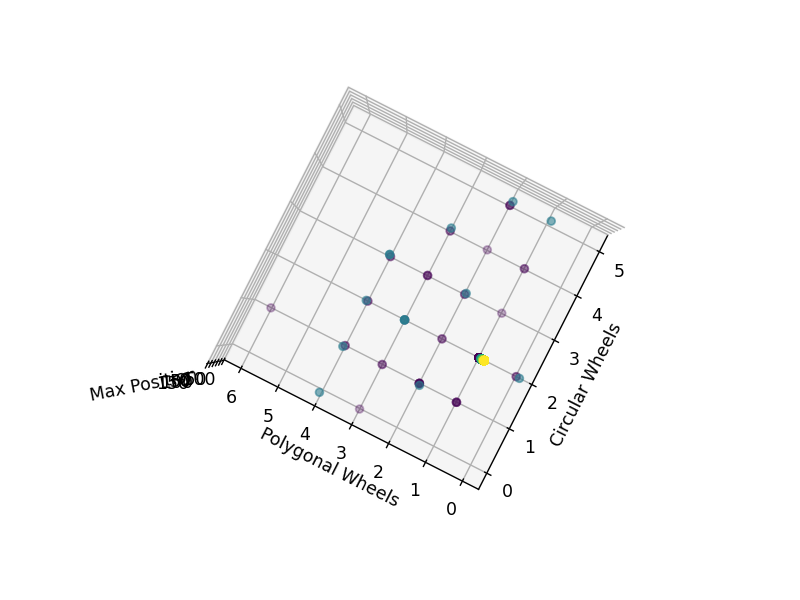

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib nbagg

# Crea una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crea lo scatter plot tridimensionale
ax.scatter(new_df['circular_wheels'], new_df['polygonal_wheels'], new_df['max_position'], c = new_df['max_position'])

# Aggiungi etichette personalizzate agli assi
ax.set_xlabel('Circular Wheels')
ax.set_ylabel('Polygonal Wheels')
ax.set_zlabel('Max Position')

# Mostra il grafico
plt.show()